## Main code

Training...


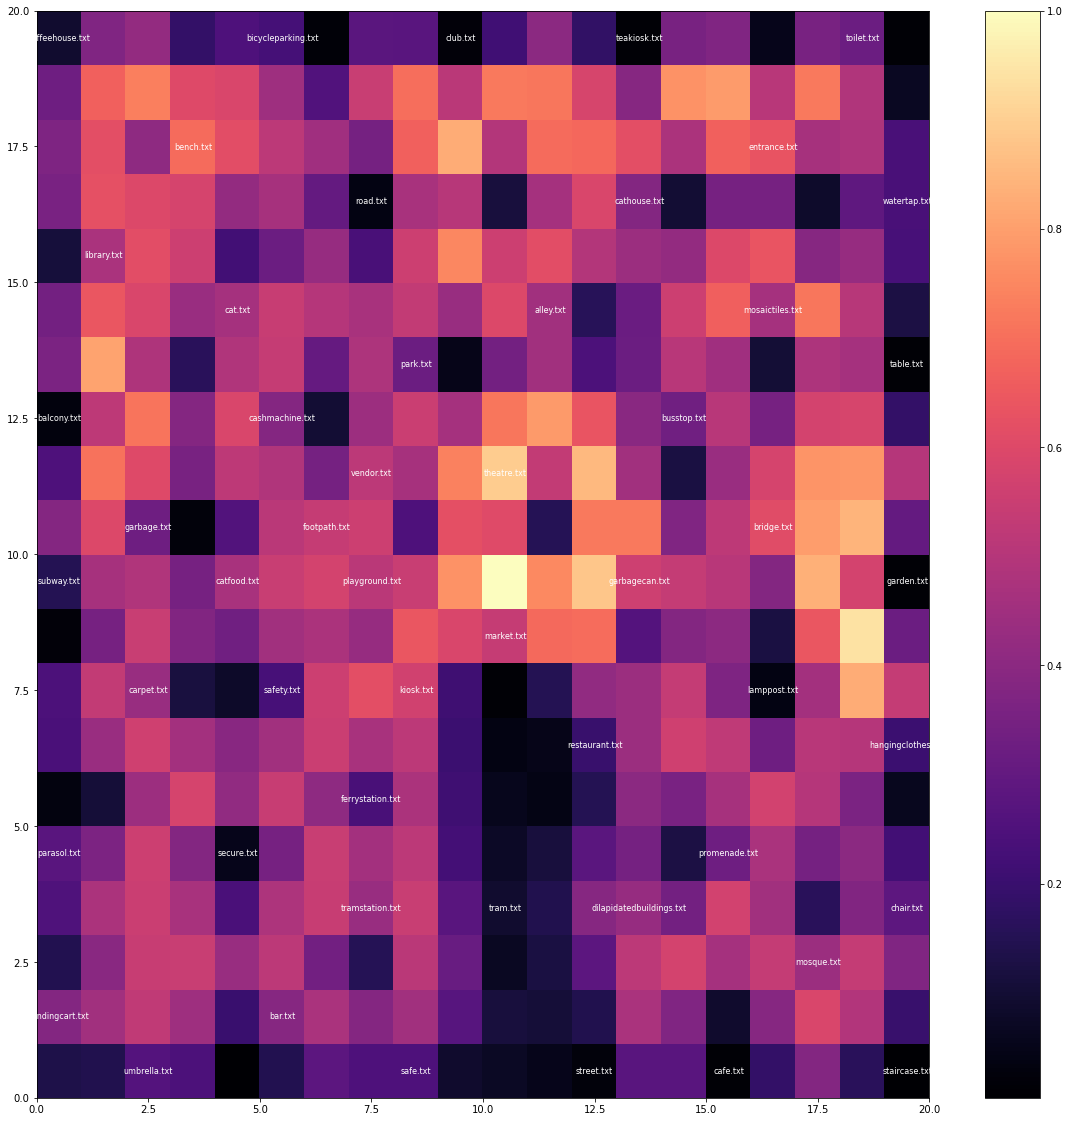

In [22]:
import os
import numpy as np
from minisom import MiniSom
from sklearn.feature_extraction.text import CountVectorizer
from pylab import pcolor, colorbar, plot, text
import matplotlib.pyplot as plt

# Set the path to the folder containing the text files
path_to_folder = "/Users/evelyn/Documents/RC_11/Term_02/textfiles"

# Read the text files and store the contents and file names in separate lists
text_files = []
file_names = []
for file_name in os.listdir(path_to_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(path_to_folder, file_name), "r") as file:
            text = file.read()
            text_files.append(text)
            file_names.append(file_name)

# Use CountVectorizer to extract features from the text
vectorizer = CountVectorizer(stop_words="english", lowercase=True)
X = vectorizer.fit_transform(text_files).toarray()

# Set the shape of the SOM
som_shape = (20, 20)

# Create the SOM
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
print("Training...")
som.train_random(X, 10000)  # Train for 100 iterations

# Create a list to store the file names for each SOM node
node_file_names = [[] for _ in range(som_shape[0] * som_shape[1])]

# Find the file names for each SOM node
for i in range(len(text_files)):
    data_point = X[i]
    node_index = som.winner(data_point)
    node_file_names[node_index[0] * som_shape[1] + node_index[1]].append(file_names[i])

# Increase the figure size
plt.figure(figsize=(20, 20))

# Visualize the SOM using the U-matrix and add text labels for each cell
u = som.distance_map().T
pcolor(u, cmap='magma')
colorbar()

# Add text label for each cell
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        idx = i * som_shape[1] + j
        text_color = 'white' if u[i][j] < np.mean(u) else 'black'
        if node_file_names[idx]:
            plt.text(j+0.5, i+0.5, node_file_names[idx][0], color='white', ha='center', va='center', fontsize=8)

# Save the plot with higher dpi
plt.savefig('som.png', dpi=300)


In [15]:
len(node_file_names)

400

Training...


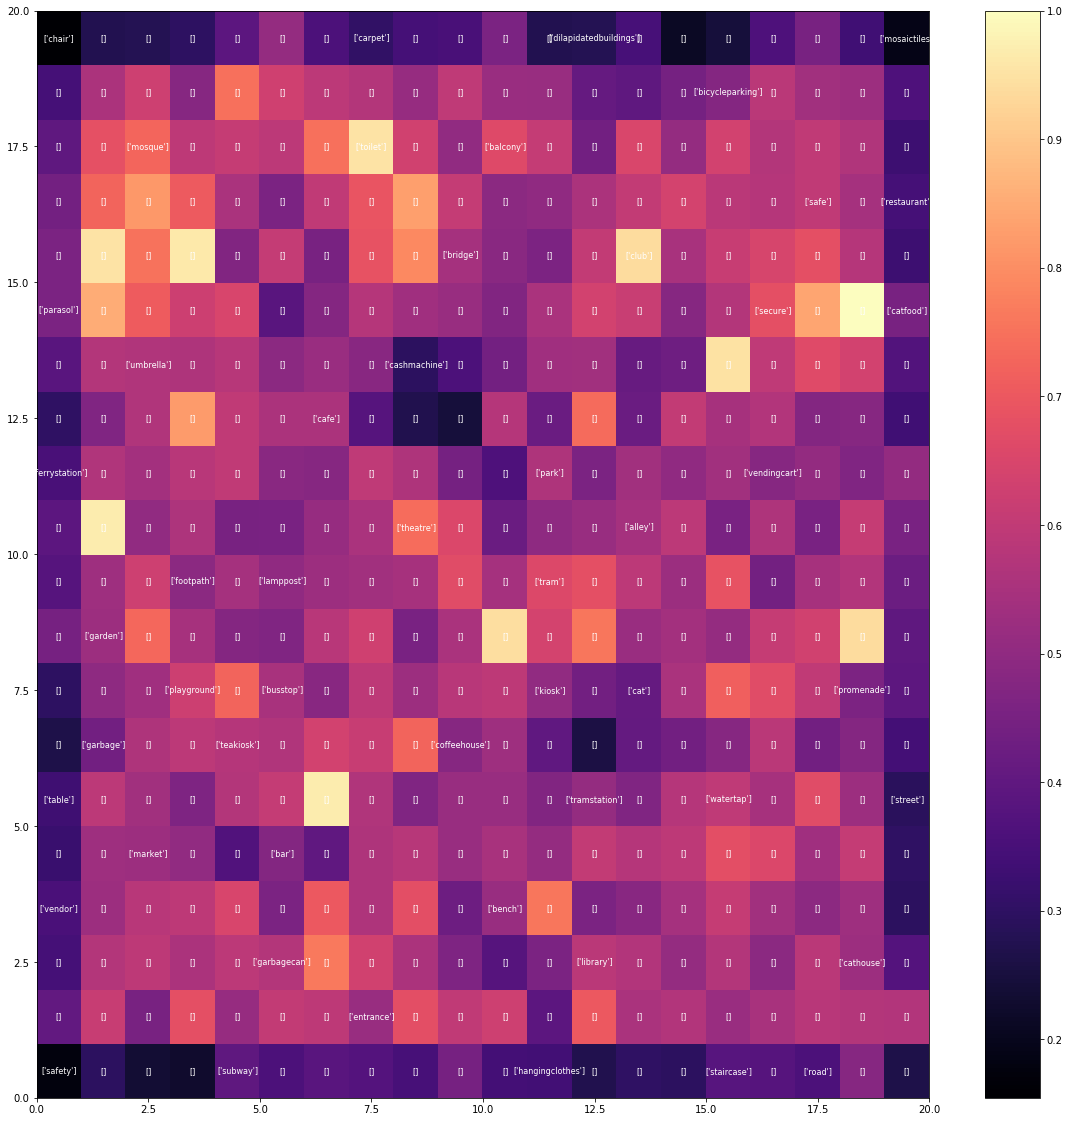

In [16]:
import os
import numpy as np
from minisom import MiniSom
from sklearn.feature_extraction.text import CountVectorizer
from pylab import pcolor, colorbar, plot, text
import matplotlib.pyplot as plt

# Set the path to the folder containing the text files
path_to_folder = "/Users/evelyn/Documents/RC_11/Term_02/textfiles"

# Read the text files and store the contents and file names in separate lists
text_files = []
file_names = []
for file_name in os.listdir(path_to_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(path_to_folder, file_name), "r") as file:
            text = file.read()
            text_files.append(text)
            file_names.append(os.path.splitext(file_name)[0])  # remove .txt extension

# Use CountVectorizer to extract features from the text
vectorizer = CountVectorizer(stop_words="english", lowercase=True)
X = vectorizer.fit_transform(text_files).toarray()

# Set the shape of the SOM
som_shape = (20, 20)

# Create the SOM
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
print("Training...")
som.train_random(X, 100)  # Train for 100 iterations

# Create a list to store the file names for each SOM node
node_file_names = [[] for _ in range(som_shape[0] * som_shape[1])]

# Find the file names for each SOM node
for i in range(len(text_files)):
    data_point = X[i]
    node_index = som.winner(data_point)
    node_file_names[node_index[0] * som_shape[1] + node_index[1]].append(file_names[i])

# Increase the figure size
plt.figure(figsize=(20, 20))

# Visualize the SOM using the U-matrix and add text labels for each cell
u = som.distance_map().T
pcolor(u, cmap='magma')
colorbar()

# Add text label for each cell
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        idx = i * som_shape[1] + j
        text_color = 'white' if u[i][j] < np.mean(u) else 'black'
        plt.text(j+0.5, i+0.5, str(node_file_names[idx]), color='white', ha='center', va='center', fontsize=8)

# Save the plot with higher dpi
plt.savefig('som.png', dpi=300)


Training...


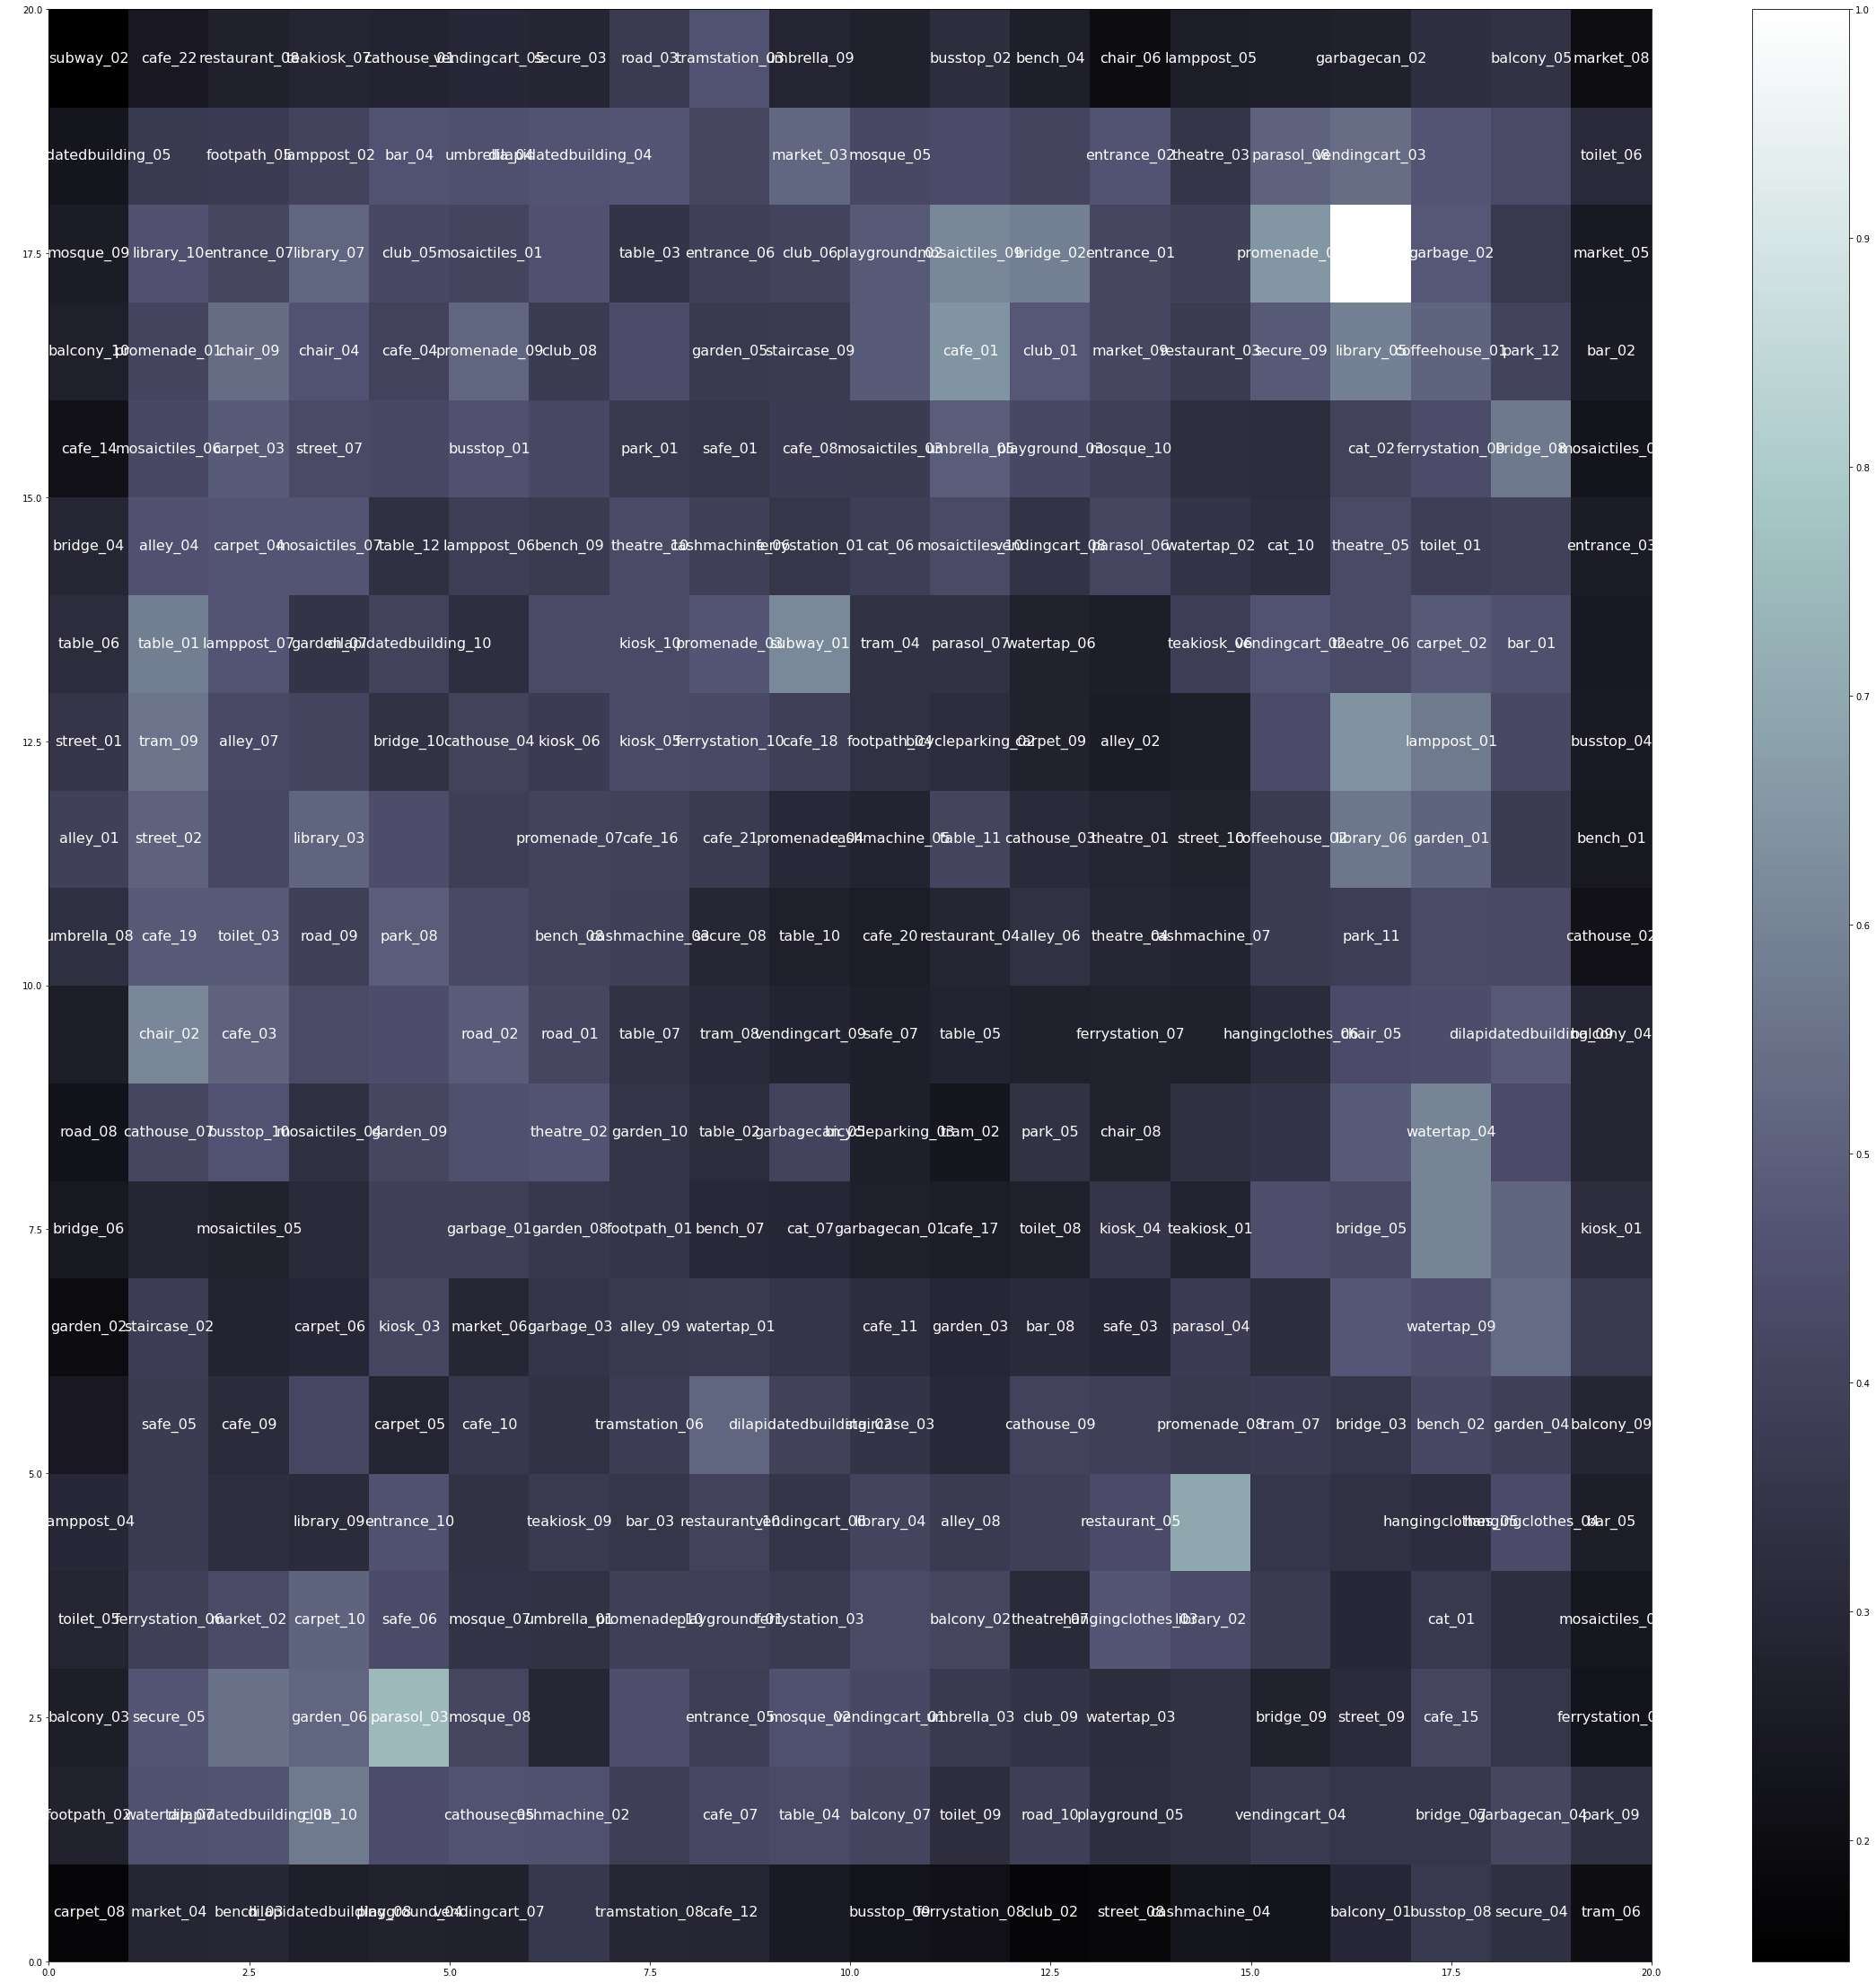

In [9]:
import os
import numpy as np
from minisom import MiniSom
from sklearn.feature_extraction.text import CountVectorizer
from pylab import pcolor, colorbar, plot, text
import matplotlib.pyplot as plt

# Set the path to the folder containing the text files
path_to_folder = "/Users/evelyn/Documents/RC_11/Term_02/textfiles"

# Read the text files and store the contents and file names in separate lists
text_files = []
file_names = []
for file_name in os.listdir(path_to_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(path_to_folder, file_name), "r") as file:
            text = file.read()
            text_files.append(text)
            file_names.append(os.path.splitext(file_name)[0])  # remove .txt extension

# Use CountVectorizer to extract features from the text
vectorizer = CountVectorizer(stop_words="english", lowercase=True)
X = vectorizer.fit_transform(text_files).toarray()

# Set the shape of the SOM
som_shape = (20,20)

# Create the SOM
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
print("Training...")
som.train_random(X, 1000)  # Train for 100 iterations

# Create a list to store the file names for each SOM node
node_file_names = [[] for _ in range(som_shape[0] * som_shape[1])]

# Find the file names for each SOM node
for i in range(len(text_files)):
    data_point = X[i]
    node_index = som.winner(data_point)
    node_file_names[node_index[0] * som_shape[1] + node_index[1]].append(file_names[i])

# Increase the figure size
plt.figure(figsize=(40,40))

# Visualize the SOM using the U-matrix and add text labels for each cell
u = som.distance_map().T
pcolor(u, cmap='bone')
colorbar()

# Add text label for each cell
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        idx = i * som_shape[1] + j
        text_color = 'white' if u[i][j] < np.mean(u) else 'black'
        if node_file_names[idx]:
            plt.text(j+0.5, i+0.5, node_file_names[idx][0], color='white', ha='center', va='center', fontsize=16)



# Save the plot with higher dpi
plt.savefig('som.png', dpi=300)
